In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import itertools

In [2]:
def plot_learning_curve(estimator, title,file, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.2,1.0,10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(file)
    plt.show()
    return plt

In [3]:
def plot_validation_curve(file, X,y,estimator,name): 
    param_range = [1e-05,1e-04,1e-03,1e-02,1e-01,1,2,3]
    param_name = 'alpha'


    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve for " + name)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
    plt.legend(loc="best")
    plt.savefig(file)
    plt.show()

In [4]:
def confusion_matrix_2(file, cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(file)
    plt.show()

In [5]:
def confusion(file, Y_test,pred,title):
    cnf_matrix = confusion_matrix(Y_test,pred)
    plt.figure()
    a = confusion_matrix_2(file, cnf_matrix,classes=['0','1'],title=title)

In [6]:
%store -r best_hf_pca
%store -r best_hf_ica
%store -r best_hf_rp
%store -r best_hf_tsvd
%store -r Y_hf_train
%store -r best_hf_dt

# Neural Network: PCA

In [13]:
x_hf_pca_train, x_hf_pca_test, y_hf_pca_train, y_hf_pca_test = train_test_split(best_hf_pca, Y_hf_train,test_size=0.4, random_state=3169)

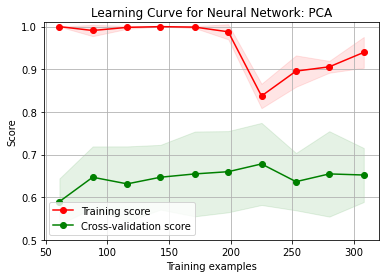

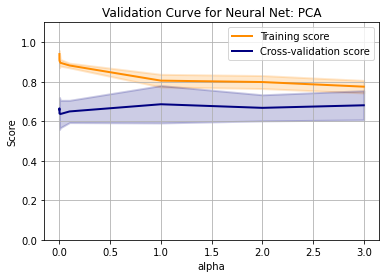

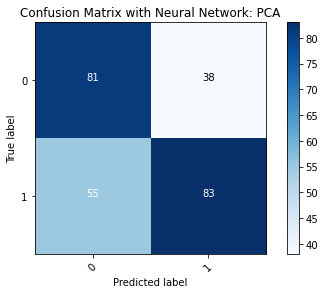

Accuracy for Neural Network is 0.6381322957198443
Training time for Neural Network: 0.12048840522766113 seconds
Testing time for Neural Network: 0.00099945068359375 seconds



In [75]:
hf_pca_nn = MLPClassifier(activation='tanh',alpha=1e-03,batch_size='auto',learning_rate='adaptive',learning_rate_init=0.1,solver='adam')
st = time.time()
hf_pca_nn.fit(x_hf_pca_train,y_hf_pca_train)
end = time.time()
train_time = end-st
stt = time.time()
y_hf_pca_pred = hf_pca_nn.predict(x_hf_pca_test)
endt = time.time()
y_hf_pca_test = np.array(y_hf_pca_test)
y_hf_pca_pred = np.array(y_hf_pca_pred)
title = 'Confusion Matrix with Neural Network: PCA'

lc = plot_learning_curve(hf_pca_nn,'Learning Curve for Neural Network: PCA', 'lc_hf_pca_nn.png', x_hf_pca_train, y_hf_pca_train, (0.5, 1.01), n_jobs=4)
plot_validation_curve('vc_hf_pca_nn.png', x_hf_pca_train,y_hf_pca_train,hf_pca_nn,'Neural Net: PCA')
confusion('con_hf_pca_nn.png',y_hf_pca_test,y_hf_pca_pred,title)

print('Accuracy for Neural Network is ' + str(accuracy_score(y_hf_pca_test,y_hf_pca_pred)))
print('Training time for Neural Network: ' + str(train_time) + ' seconds')
print('Testing time for Neural Network: ' + str(endt-stt) + ' seconds')
print()

# Neural Network: ICA

In [43]:
x_hf_ica_train, x_hf_ica_test, y_hf_ica_train, y_hf_ica_test = train_test_split(best_hf_ica, Y_hf_train,test_size=0.4, random_state=3169)

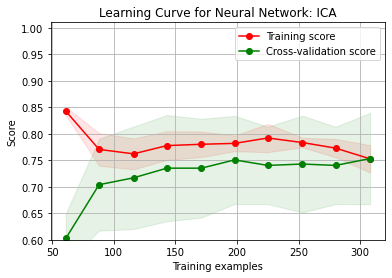

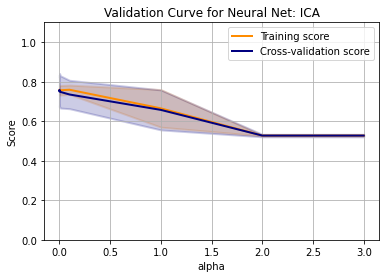

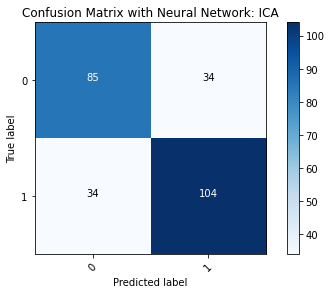

Accuracy for Neural Network is 0.7354085603112841
Training time for Neural Network: 0.07089400291442871 seconds
Testing time for Neural Network: 0.0 seconds



In [74]:
hf_ica_nn = MLPClassifier(activation='tanh',alpha=1e-03,batch_size='auto',learning_rate='adaptive',learning_rate_init=0.1,solver='adam')
st = time.time()
hf_ica_nn.fit(x_hf_ica_train,y_hf_ica_train)
end = time.time()
train_time = end-st
stt = time.time()
y_hf_ica_pred = hf_ica_nn.predict(x_hf_ica_test)
endt = time.time()
y_hf_ica_test = np.array(y_hf_ica_test)
y_hf_ica_pred = np.array(y_hf_ica_pred)
title = 'Confusion Matrix with Neural Network: ICA'

lc = plot_learning_curve(hf_ica_nn,'Learning Curve for Neural Network: ICA', 'lc_hf_ica_nn.png', x_hf_ica_train, y_hf_ica_train, (0.6, 1.01), n_jobs=4)
plot_validation_curve('vc_hf_ica_nn.png', x_hf_ica_train,y_hf_ica_train,hf_ica_nn,'Neural Net: ICA')
confusion('con_hf_ica_nn.png',y_hf_ica_test,y_hf_ica_pred,title)

print('Accuracy for Neural Network is ' + str(accuracy_score(y_hf_ica_test,y_hf_ica_pred)))
print('Training time for Neural Network: ' + str(train_time) + ' seconds')
print('Testing time for Neural Network: ' + str(endt-stt) + ' seconds')
print()

# Neural Network: Random Projection

In [46]:
x_hf_rp_train, x_hf_rp_test, y_hf_rp_train, y_hf_rp_test = train_test_split(best_hf_rp, Y_hf_train,test_size=0.4, random_state=3169)

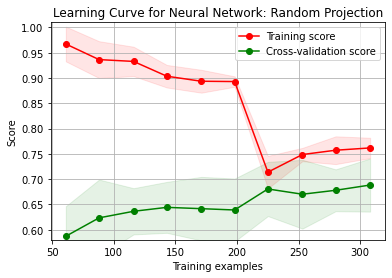

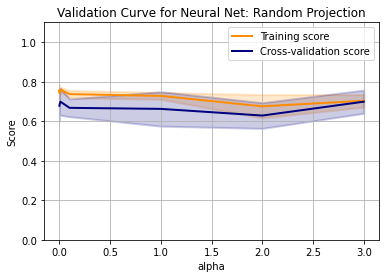

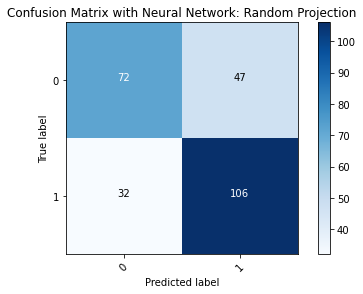

Accuracy for Neural Network is 0.6926070038910506
Training time for Neural Network: 0.10986924171447754 seconds
Testing time for Neural Network: 0.0 seconds



In [73]:
hf_rp_nn = MLPClassifier(activation='tanh',alpha=1e-03,batch_size='auto',learning_rate='adaptive',learning_rate_init=0.1,solver='adam')
st = time.time()
hf_rp_nn.fit(x_hf_rp_train,y_hf_rp_train)
end = time.time()
train_time = end-st
stt = time.time()
y_hf_rp_pred = hf_rp_nn.predict(x_hf_rp_test)
endt = time.time()
y_hf_rp_test = np.array(y_hf_rp_test)
y_hf_rp_pred = np.array(y_hf_rp_pred)
title = 'Confusion Matrix with Neural Network: Random Projection'

lc = plot_learning_curve(hf_rp_nn,'Learning Curve for Neural Network: Random Projection', 'lc_hf_rp_nn.png', x_hf_rp_train, y_hf_rp_train, (0.58, 1.01), n_jobs=4)
plot_validation_curve('vc_hf_rp_nn.png', x_hf_rp_train,y_hf_rp_train,hf_rp_nn,'Neural Net: Random Projection')
confusion('con_hf_rp_nn.png',y_hf_rp_test,y_hf_rp_pred,title)

print('Accuracy for Neural Network is ' + str(accuracy_score(y_hf_rp_test,y_hf_rp_pred)))
print('Training time for Neural Network: ' + str(train_time) + ' seconds')
print('Testing time for Neural Network: ' + str(endt-stt) + ' seconds')
print()

# Neural Network: Truncated SVD

In [48]:
x_hf_tsvd_train, x_hf_tsvd_test, y_hf_tsvd_train, y_hf_tsvd_test = train_test_split(best_hf_tsvd, Y_hf_train,test_size=0.4, random_state=3169)

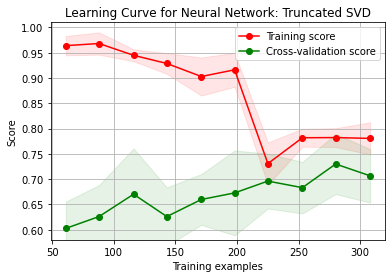

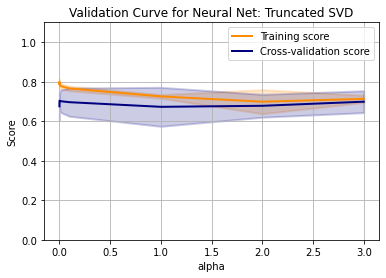

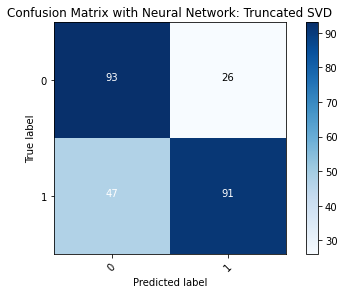

Accuracy for Neural Network is 0.7159533073929961
Training time for Neural Network: 0.1095438003540039 seconds
Testing time for Neural Network: 0.0009996891021728516 seconds



In [72]:
hf_tsvd_nn = MLPClassifier(activation='tanh',alpha=1e-03,batch_size='auto',learning_rate='adaptive',learning_rate_init=0.1,solver='adam')
st = time.time()
hf_tsvd_nn.fit(x_hf_tsvd_train,y_hf_tsvd_train)
end = time.time()
train_time = end-st
stt = time.time()
y_hf_tsvd_pred = hf_tsvd_nn.predict(x_hf_tsvd_test)
endt = time.time()
y_hf_tsvd_test = np.array(y_hf_tsvd_test)
y_hf_tsvd_pred = np.array(y_hf_tsvd_pred)
title = 'Confusion Matrix with Neural Network: Truncated SVD'

lc = plot_learning_curve(hf_tsvd_nn,'Learning Curve for Neural Network: Truncated SVD', 'lc_hf_tsvd_nn.png', x_hf_tsvd_train, y_hf_tsvd_train, (0.58, 1.01), n_jobs=4)
plot_validation_curve('vc_hf_tsvd_nn.png', x_hf_tsvd_train,y_hf_tsvd_train,hf_tsvd_nn,'Neural Net: Truncated SVD')
confusion('con_hf_tsvd_nn.png',y_hf_tsvd_test,y_hf_tsvd_pred,title)

print('Accuracy for Neural Network is ' + str(accuracy_score(y_hf_tsvd_test,y_hf_tsvd_pred)))
print('Training time for Neural Network: ' + str(train_time) + ' seconds')
print('Testing time for Neural Network: ' + str(endt-stt) + ' seconds')
print()

# Neural Netowrk: Decision Tree 

In [48]:
x_hf_dt_train, x_hf_dt_test, y_hf_dt_train, y_hf_dt_test = train_test_split(best_hf_dt, Y_hf_train,test_size=0.4, random_state=3169)

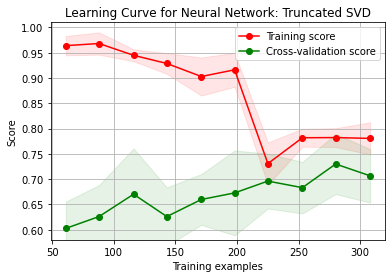

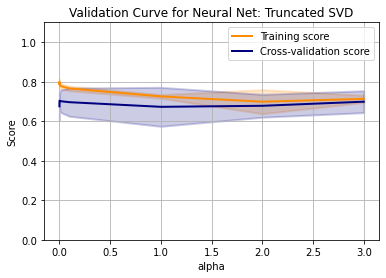

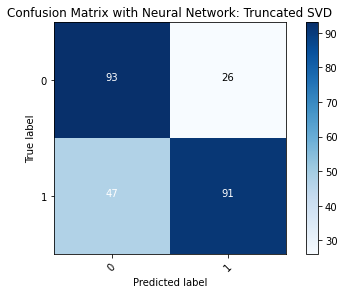

Accuracy for Neural Network is 0.7159533073929961
Training time for Neural Network: 0.1095438003540039 seconds
Testing time for Neural Network: 0.0009996891021728516 seconds



In [72]:
hf_dt_nn = MLPClassifier(activation='tanh',alpha=1e-03,batch_size='auto',learning_rate='adaptive',learning_rate_init=0.1,solver='adam')
st = time.time()
hf_dt_nn.fit(x_hf_dt_train,y_hf_dt_train)
end = time.time()
train_time = end-st
stt = time.time()
y_hf_dt_pred = hf_dt_nn.predict(x_hf_dt_test)
endt = time.time()
y_hf_dt_test = np.array(y_hf_dt_test)
y_hf_dt_pred = np.array(y_hf_dt_pred)
title = 'Confusion Matrix with Neural Network: Decision Tree'

lc = plot_learning_curve(hf_dt_nn,'Learning Curve for Neural Network: Dec', 'lc_hf_dt_nn.png', x_hf_dt_train, y_hf_dt_train, (0.58, 1.01), n_jobs=4)
plot_validation_curve('vc_hf_dt_nn.png', x_hf_dt_train,y_hf_dt_train,hf_dt_nn,'Neural Net: Decision Tree')
confusion('con_hf_dt_nn.png',y_hf_dt_test,y_hf_dt_pred,title)

print('Accuracy for Neural Network is ' + str(accuracy_score(y_hf_dt_test,y_hf_dt_pred)))
print('Training time for Neural Network: ' + str(train_time) + ' seconds')
print('Testing time for Neural Network: ' + str(endt-stt) + ' seconds')
print()

# Neural Network with Clusterd Data

In [50]:
%store -r k_hf
%store -r gmm_hf

## K Means

In [51]:
x_hf_k_train, x_hf_k_test, y_hf_k_train, y_hf_k_test = train_test_split(k_hf, Y_hf_train,test_size=0.4, random_state=3169)

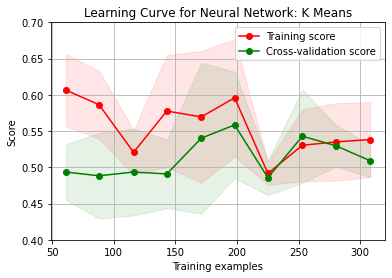

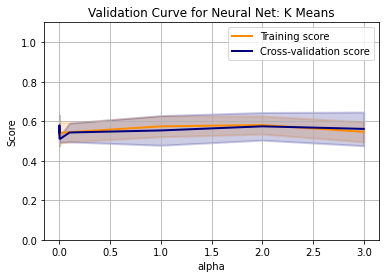

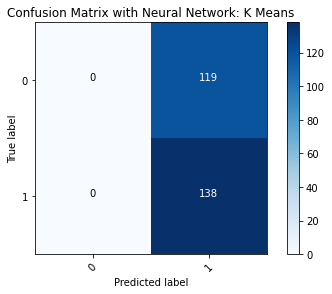

Accuracy for Neural Network is 0.5369649805447471
Training time for Neural Network: 0.07975602149963379 seconds
Testing time for Neural Network: 0.0010006427764892578 seconds



In [71]:
hf_k_nn = MLPClassifier(activation='tanh',alpha=1e-03,batch_size='auto',learning_rate='adaptive',learning_rate_init=0.1,solver='adam')
st = time.time()
hf_k_nn.fit(x_hf_k_train,y_hf_k_train)
end = time.time()
train_time = end-st
stt = time.time()
y_hf_k_pred = hf_k_nn.predict(x_hf_k_test)
endt = time.time()
y_hf_k_test = np.array(y_hf_k_test)
y_hf_k_pred = np.array(y_hf_k_pred)
title = 'Confusion Matrix with Neural Network: K Means'

lc = plot_learning_curve(hf_k_nn,'Learning Curve for Neural Network: K Means', 'lc_hf_k_nn.png', x_hf_k_train, y_hf_k_train, (0.4, 0.7), n_jobs=4)
plot_validation_curve('vc_hf_k_nn.png', x_hf_k_train,y_hf_k_train,hf_k_nn,'Neural Net: K Means')
confusion('con_hf_k_nn.png',y_hf_k_test,y_hf_k_pred,title)

print('Accuracy for Neural Network is ' + str(accuracy_score(y_hf_k_test,y_hf_k_pred)))
print('Training time for Neural Network: ' + str(train_time) + ' seconds')
print('Testing time for Neural Network: ' + str(endt-stt) + ' seconds')
print()

## Gaussian Mixture

In [52]:
x_hf_gmm_train, x_hf_gmm_test, y_hf_gmm_train, y_hf_gmm_test = train_test_split(gmm_hf, Y_hf_train,test_size=0.4, random_state=3169)

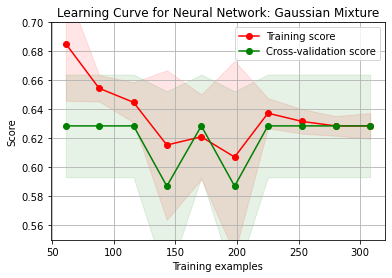

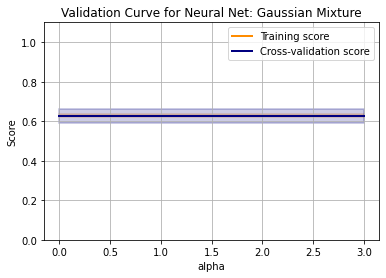

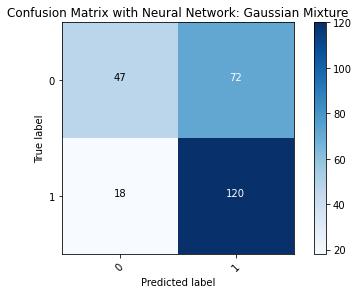

Accuracy for Neural Network is 0.6498054474708171
Training time for Neural Network: 0.058028221130371094 seconds
Testing time for Neural Network: 0.0009999275207519531 seconds



In [70]:
hf_gmm_nn = MLPClassifier(activation='tanh',alpha=1e-03,batch_size='auto',learning_rate='adaptive',learning_rate_init=0.1,solver='adam')
st = time.time()
hf_gmm_nn.fit(x_hf_gmm_train,y_hf_gmm_train)
end = time.time()
train_time = end-st
stt = time.time()
y_hf_gmm_pred = hf_gmm_nn.predict(x_hf_gmm_test)
endt = time.time()
y_hf_gmm_test = np.array(y_hf_gmm_test)
y_hf_gmm_pred = np.array(y_hf_gmm_pred)
title = 'Confusion Matrix with Neural Network: Gaussian Mixture'

lc = plot_learning_curve(hf_gmm_nn,'Learning Curve for Neural Network: Gaussian Mixture', 'lc_hf_gmm_nn.png', x_hf_gmm_train, y_hf_gmm_train, (0.55, 0.7), n_jobs=4)
plot_validation_curve('vc_hf_gmm_nn.png', x_hf_gmm_train,y_hf_gmm_train,hf_gmm_nn,'Neural Net: Gaussian Mixture')
confusion('con_hf_gmm_nn.png',y_hf_gmm_test,y_hf_gmm_pred,title)

print('Accuracy for Neural Network is ' + str(accuracy_score(y_hf_gmm_test,y_hf_gmm_pred)))
print('Training time for Neural Network: ' + str(train_time) + ' seconds')
print('Testing time for Neural Network: ' + str(endt-stt) + ' seconds')
print()